In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('CSV_Loading').getOrCreate()

In [ ]:
spark_df = spark.read.csv('/content/drive/MyDrive/extracted_archive/MachineLearningCVE/balanced_dataset.csv', header=True, inferSchema=True)
spark_df.show(5)

+---+----------------+-------------+-----------------+----------------------+---------------------------+---------------------------+---------------------+---------------------+----------------------+---------------------+---------------------+---------------------+----------------------+---------------------+---------------+--------------+-------------+---------------+------------+------------+-------------+------------+---------------+-----------+-----------+-------------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+-----------------+-----------------+--------------+-------------+-----------------+-----------------+------------------+-----------------+----------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+-------------------+--------------------+--------------------+-------------------+------------------+--------------------

In [ ]:
spark_df.printSchema()
spark_df.show(n=10)

root
 |-- _c0: integer (nullable = true)
 |-- Destination Port: integer (nullable = true)
 |-- Flow Duration: integer (nullable = true)
 |-- Total Fwd Packets: integer (nullable = true)
 |-- Total Backward Packets: integer (nullable = true)
 |-- Total Length of Fwd Packets: integer (nullable = true)
 |-- Total Length of Bwd Packets: integer (nullable = true)
 |-- Fwd Packet Length Max: integer (nullable = true)
 |-- Fwd Packet Length Min: integer (nullable = true)
 |-- Fwd Packet Length Mean: double (nullable = true)
 |-- Fwd Packet Length Std: double (nullable = true)
 |-- Bwd Packet Length Max: integer (nullable = true)
 |-- Bwd Packet Length Min: integer (nullable = true)
 |-- Bwd Packet Length Mean: double (nullable = true)
 |-- Bwd Packet Length Std: double (nullable = true)
 |-- Flow Bytes/s: string (nullable = true)
 |-- Flow Packets/s: string (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: integer (nu

In [ ]:
sample_df = spark_df.sample(False, 0.1, seed=42).toPandas()

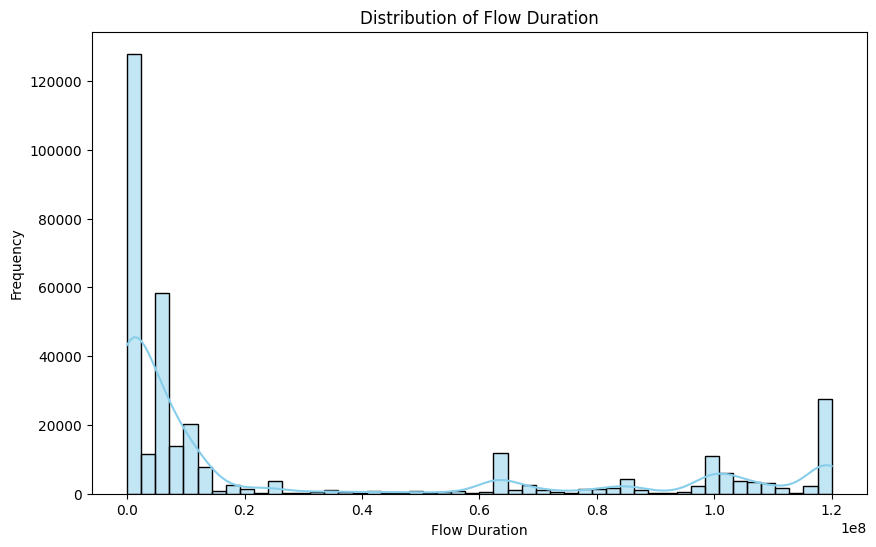

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType

# Plot 1: Histogram of 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.histplot(sample_df['Flow Duration'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Flow Duration')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.show()

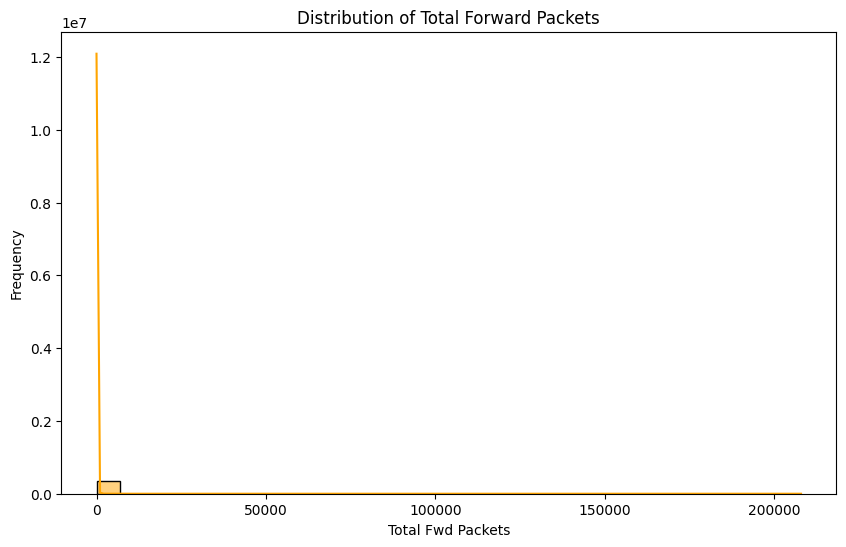

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sample_df['Total Fwd Packets'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Forward Packets')
plt.xlabel('Total Fwd Packets')
plt.ylabel('Frequency')
plt.show()

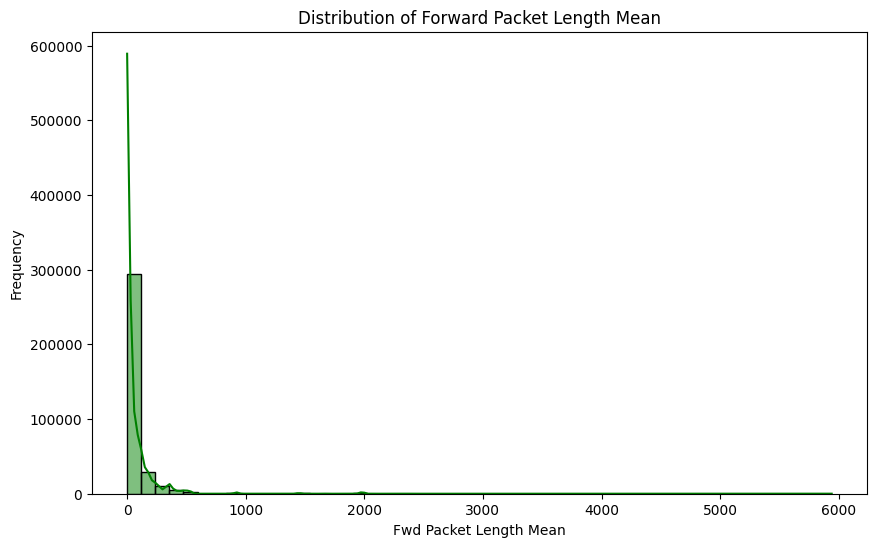

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sample_df['Fwd Packet Length Mean'], bins=50, kde=True, color='green')
plt.title('Distribution of Forward Packet Length Mean')
plt.xlabel('Fwd Packet Length Mean')
plt.ylabel('Frequency')
plt.show()

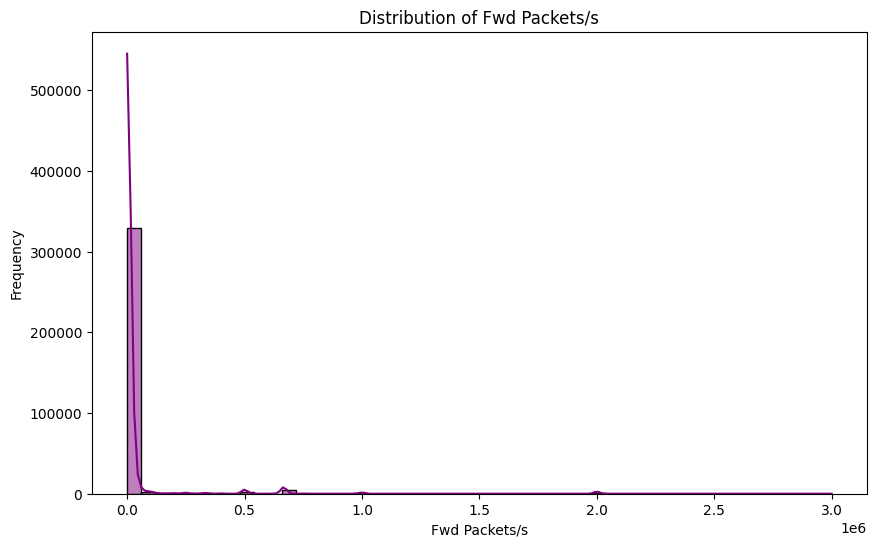

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sample_df['Fwd Packets/s'], bins=50, kde=True, color='purple')
plt.title('Distribution of Fwd Packets/s')
plt.xlabel('Fwd Packets/s')
plt.ylabel('Frequency')
plt.show()

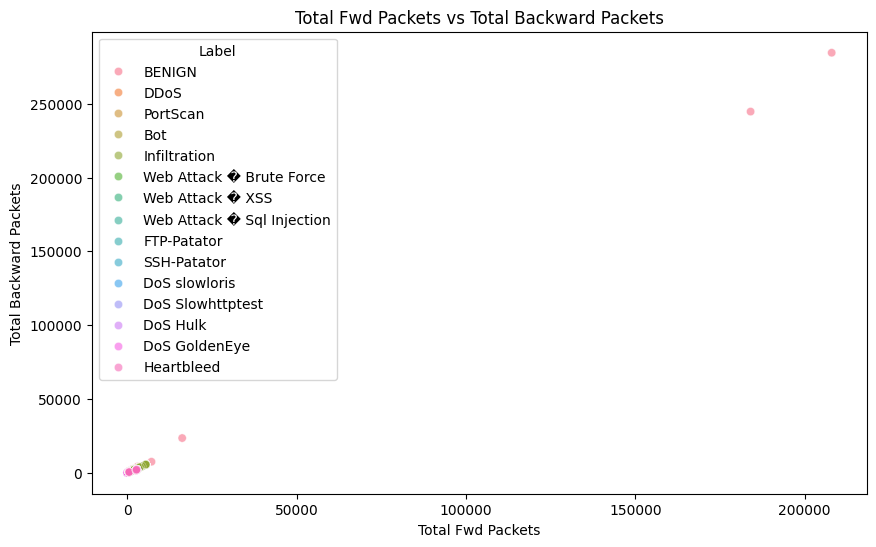

In [ ]:
# Plot 5: Scatter plot for 'Total Fwd Packets' vs 'Total Backward Packets'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Fwd Packets', y='Total Backward Packets', hue='Label', data=sample_df, alpha=0.6)
plt.title('Total Fwd Packets vs Total Backward Packets')
plt.xlabel('Total Fwd Packets')
plt.ylabel('Total Backward Packets')
plt.show()

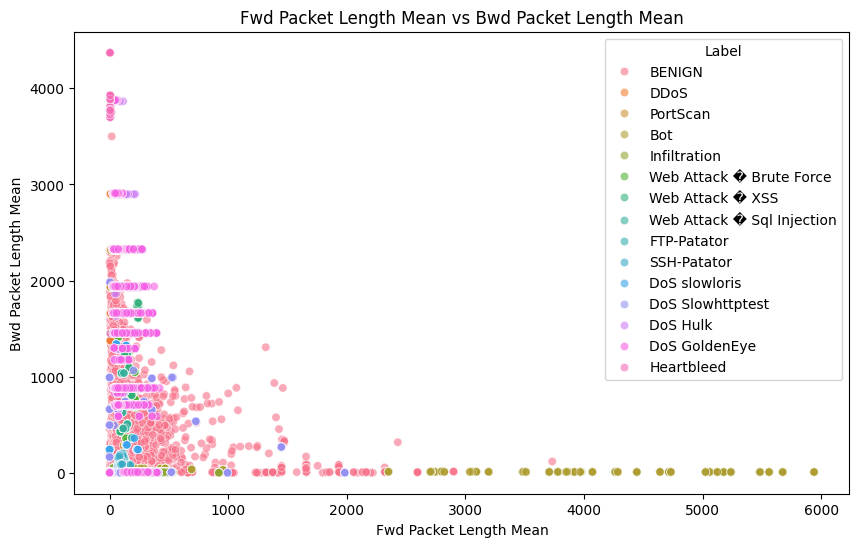

In [ ]:
# Plot 7: Scatter plot for 'Fwd Packet Length Mean' vs 'Bwd Packet Length Mean'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fwd Packet Length Mean', y='Bwd Packet Length Mean', hue='Label', data=sample_df, alpha=0.6)
plt.title('Fwd Packet Length Mean vs Bwd Packet Length Mean')
plt.xlabel('Fwd Packet Length Mean')
plt.ylabel('Bwd Packet Length Mean')
plt.show()

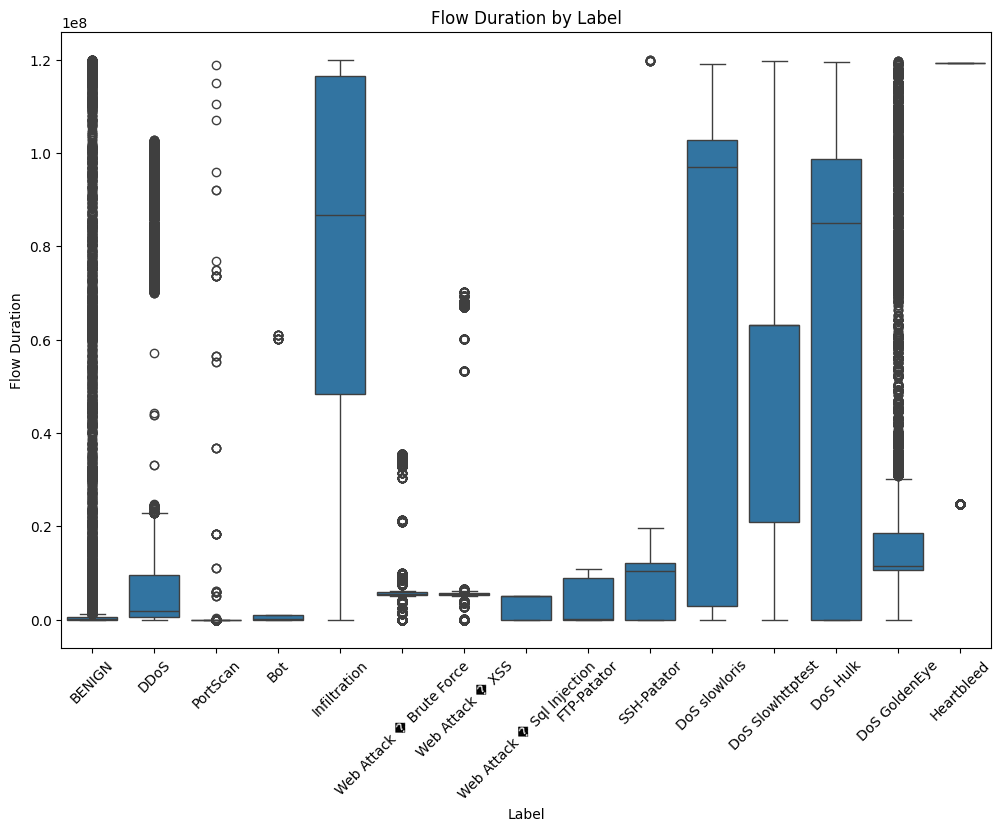

In [ ]:
# Plot 8: Box plot of 'Flow Duration' by 'Label'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='Flow Duration', data=sample_df)
plt.title('Flow Duration by Label')
plt.xlabel('Label')
plt.ylabel('Flow Duration')
plt.xticks(rotation=45)
plt.show()

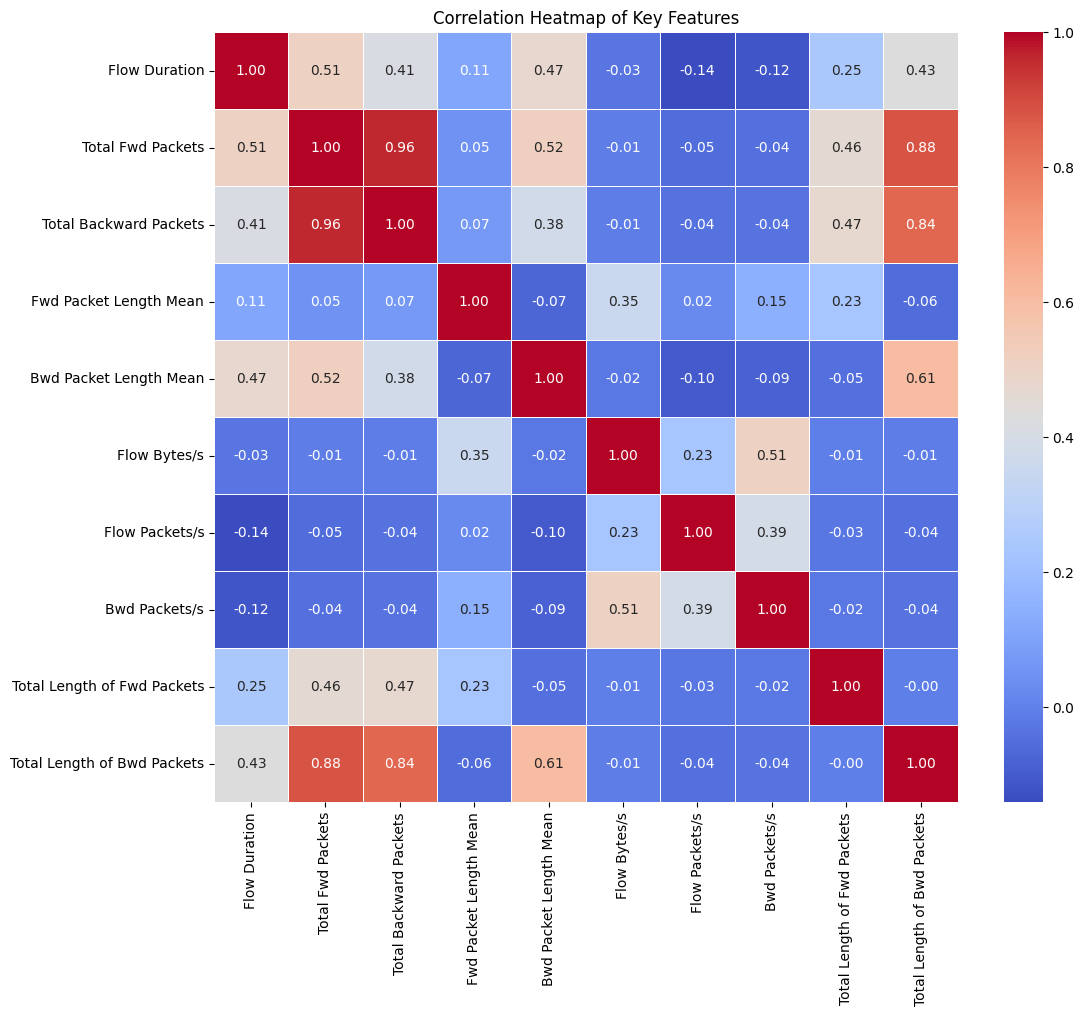

In [ ]:
# Plot 10: Correlation Heatmap
# Select a few key numerical columns for the heatmap
numerical_cols = [
    'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
    'Flow Bytes/s', 'Flow Packets/s', 'Bwd Packets/s',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets'
]

# Compute the correlation matrix
corr_matrix = sample_df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Key Features')
plt.show()

/tmp/ipython-input-4267955208.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Label', data=sample_df, order=sample_df['Label'].value_counts().index, palette='viridis')


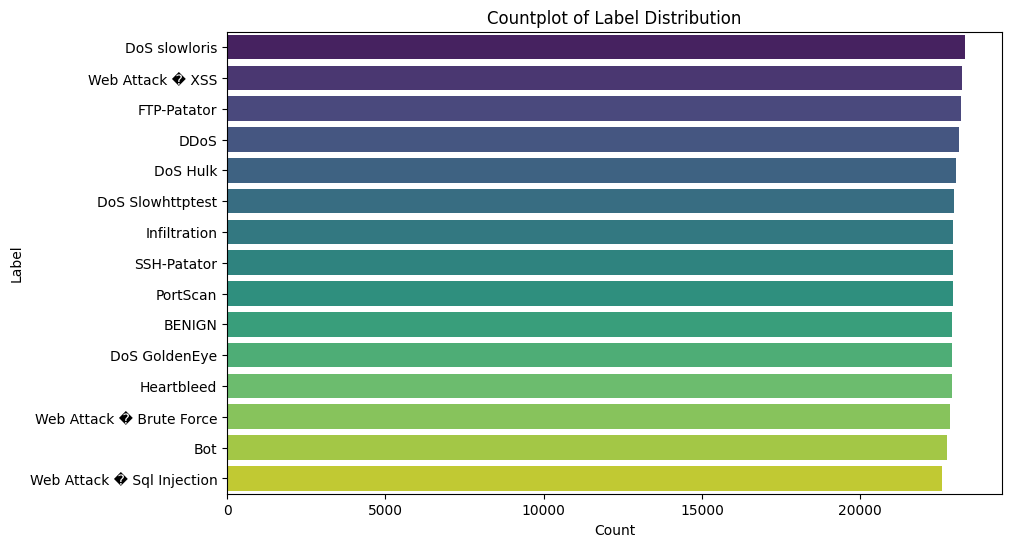

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-calculate label counts from the Spark DataFrame for plotting.
label_counts_df = spark_df.groupBy('Label').count().orderBy('count', ascending=False)
label_counts_pd = label_counts_df.toPandas()

# Plot 11: Seaborn Countplot for Label Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Label', data=sample_df, order=sample_df['Label'].value_counts().index, palette='viridis')
plt.title('Countplot of Label Distribution')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

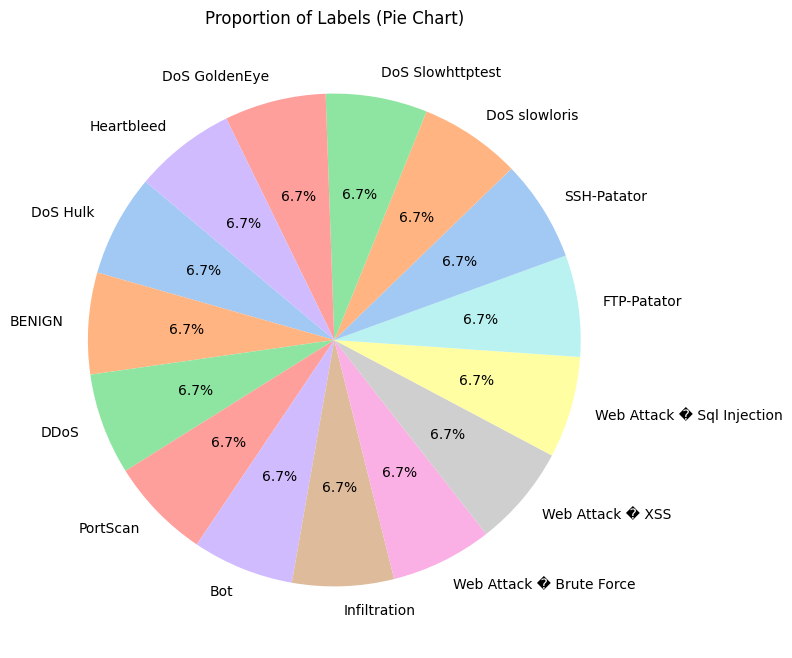

In [ ]:
# Plot 12: Matplotlib Pie Chart for Label Distribution
plt.figure(figsize=(8, 8))
plt.pie(label_counts_pd['count'], labels=label_counts_pd['Label'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Labels (Pie Chart)')
plt.show()

In [ ]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Destination Port: integer (nullable = true)
 |-- Flow Duration: integer (nullable = true)
 |-- Total Fwd Packets: integer (nullable = true)
 |-- Total Backward Packets: integer (nullable = true)
 |-- Total Length of Fwd Packets: integer (nullable = true)
 |-- Total Length of Bwd Packets: integer (nullable = true)
 |-- Fwd Packet Length Max: integer (nullable = true)
 |-- Fwd Packet Length Min: integer (nullable = true)
 |-- Fwd Packet Length Mean: double (nullable = true)
 |-- Fwd Packet Length Std: double (nullable = true)
 |-- Bwd Packet Length Max: integer (nullable = true)
 |-- Bwd Packet Length Min: integer (nullable = true)
 |-- Bwd Packet Length Mean: double (nullable = true)
 |-- Bwd Packet Length Std: double (nullable = true)
 |-- Flow Bytes/s: string (nullable = true)
 |-- Flow Packets/s: string (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: integer (nu

In [ ]:
numerical_cols = [col for col, dtype in spark_df.dtypes if dtype in ['int', 'long', 'double']]
categorical_cols = ['Label']

# Identify string type numerical columns that need casting
string_numerical_cols = [col for col, dtype in spark_df.dtypes if dtype == 'string' and col in ['Flow Bytes/s', 'Flow Packets/s']]

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)
print("String numerical columns to cast:", string_numerical_cols)

Numerical columns: ['_c0', 'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average 

In [ ]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Label", outputCol="label_index")
spark_df_indexed = indexer.fit(spark_df).transform(spark_df)

spark_df_indexed.select("Label", "label_index").show(5)

+------+-----------+
| Label|label_index|
+------+-----------+
|BENIGN|        1.0|
|BENIGN|        1.0|
|BENIGN|        1.0|
|BENIGN|        1.0|
|BENIGN|        1.0|
+------+-----------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType

for column in string_numerical_cols:
    spark_df_indexed = spark_df_indexed.withColumn(column, col(column).cast(DoubleType()))

spark_df_indexed.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Destination Port: integer (nullable = true)
 |-- Flow Duration: integer (nullable = true)
 |-- Total Fwd Packets: integer (nullable = true)
 |-- Total Backward Packets: integer (nullable = true)
 |-- Total Length of Fwd Packets: integer (nullable = true)
 |-- Total Length of Bwd Packets: integer (nullable = true)
 |-- Fwd Packet Length Max: integer (nullable = true)
 |-- Fwd Packet Length Min: integer (nullable = true)
 |-- Fwd Packet Length Mean: double (nullable = true)
 |-- Fwd Packet Length Std: double (nullable = true)
 |-- Bwd Packet Length Max: integer (nullable = true)
 |-- Bwd Packet Length Min: integer (nullable = true)
 |-- Bwd Packet Length Mean: double (nullable = true)
 |-- Bwd Packet Length Std: double (nullable = true)
 |-- Flow Bytes/s: double (nullable = true)
 |-- Flow Packets/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: integer (nu

In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

# Assemble numerical features into a vector
assembler_inputs = numerical_cols + string_numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="unscaled_features")
spark_df_assembled = assembler.transform(spark_df_indexed)

# Apply StandardScaler
scaler = StandardScaler(inputCol="unscaled_features", outputCol="scaled_features", withStd=True, withMean=True)
scaler_model = scaler.fit(spark_df_assembled)
spark_df_scaled = scaler_model.transform(spark_df_assembled)

spark_df_scaled.select("unscaled_features", "scaled_features").show(5, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
final_spark_df = spark_df_scaled.select("scaled_features", "label_index")
final_spark_df.show(5, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from pyspark.sql.functions import col, isnan, when, size
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.types import ArrayType, DoubleType
import pyspark.sql.functions as F

# First, let's check for NaN values in the dataset
print("Checking for NaN/null values...")
total_count = final_spark_df.count()
print(f"Total rows: {total_count}")

# Convert vector to array to check for NaN values
from pyspark.ml.functions import vector_to_array

# Add vector_to_array function if not available
df_with_array = final_spark_df.select(
    vector_to_array("scaled_features").alias("features_array"),
    "label_index"
)

# Check for NaN values
from pyspark.sql.functions import expr

df_nan_check = df_with_array.select(
    expr("exists(features_array, x -> isnan(x) or x = 'Infinity' or x = '-Infinity')").alias("has_nan"),
    "label_index"
)

nan_count = df_nan_check.filter(col("has_nan") == True).count()
print(f"Rows with NaN/Infinity values: {nan_count}")

Checking for NaN/null values...
Total rows: 3451073
Rows with NaN/Infinity values: 3451073


In [ ]:
from pyspark.ml.linalg import Vectors, DenseVector
from pyspark.sql.functions import udf
from pyspark.sql.types import StructType, StructField
import math

# Create UDF to replace NaN with 0
def replace_nan_with_zero(vector):
    if vector is None:
        return None
    values = vector.toArray()
    clean_values = [0.0 if (math.isnan(x) or math.isinf(x)) else x for x in values]
    return Vectors.dense(clean_values)

clean_vector_udf = udf(replace_nan_with_zero, VectorUDT())

# Apply the cleaning
clean_df = final_spark_df.select(
    clean_vector_udf(col("scaled_features")).alias("scaled_features"),
    "label_index"
)

print("NaN values replaced with zeros")

NaN values replaced with zeros
